# Python DLL Chapter4

## 損失関数
損失関数はニューラルネットワークの性能の**悪さ**を示す指標。

現在のニューラルネットワークが教師データに対してどれだけ適合していないか、教師データにたいして　どれだけ一致していないかということを表す。

一般に二乗和誤差、交差エントロピー誤差が使われる。

### 二乗和誤差(mean squared error)
最も有名な損失関数

$$ E = \frac{1}{2}\sum_{k}{}(y_k-t_k)^2 $$

$$
y_k : ニューラルネットワークの出力　　
t_k : 教師データ　　
k   : 次元数
$$


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
def MeanSquaredError(y, t):
    error = 0.5 * np.sum((y-t)**2)
    return(error)

In [7]:
#先ほどのmnistでは教師データは以下のような形になっている。
#下のtは2が正解となっている。
#このような表記を"one-hot表現"という
t = [0,0,1,0,0,0,0,0,0,0,]

# "2"の確率が最も高い場合
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [9]:
MeanSquaredError(np.array(y),np.array(t))

0.09750000000000003

In [10]:
# "7"の確率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [11]:
MeanSquaredError(np.array(y), np.array(t))

0.5975

### 交差エントロピー誤差(cross entropy error)

$$ E = - \sum_{k}{}t_k\log y_k $$


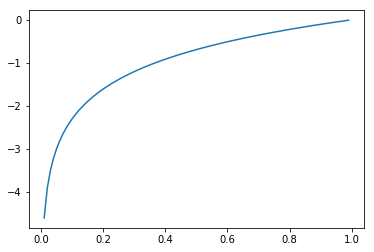

In [16]:
# y = log(x) のグラフ
x = np.arange(0.01,1,0.01)
y = np.log(x)
plt.plot(x,y)

In [19]:
def CrossEntropyError(y ,t):
    delta = 1e-7
    return(-np.sum(t*np.log(y+delta)))

In [20]:
t = [0,0,1,0,0,0,0,0,0,0,]

# "2"の確率が最も高い場合
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]


In [22]:
CrossEntropyError(np.array(y),np.array(t))

0.510825457099338

In [23]:
# "7"の確率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [24]:
CrossEntropyError(np.array(y),np.array(t))

2.302584092994546

### ミニバッチ学習
上記の損失関数はひとつの訓練データに対しての関数。

実際に訓練データが100個あれば、この損失関数は100個の損失関数の和を求め、最後に100で割って正規化をし、指標として利用する。

交差エントロピー誤差を例にすると

$$ E = -\frac{1}{N} \sum_{n}{}\sum_{k}{}t_{nk} \log y_{nk}\ $$

となる


しかし、学習データが例えばmnistだと60,000枚あるとこの誤差を求めるのに時間がかかってしまう。

そこで、訓練データの中から一定の枚数だけを選び出し(ミニバッチ)、そのミニバッチごとに学習を行う。

これを**ミニバッチ学習**という。

In [26]:
# ミニバッチ対応版
def CrossEntoropyError( y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return(-np.sum(np.log(y[np.arrange(batch_size),t] + 1e-7))/batch_size)

### 微分


In [29]:
def NumericalGradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return(grad)

In [30]:
def Function2(x):
    return(x[0]**2 + x[1]**2)

In [31]:
NumericalGradient(Function2, np.array([3.0, 4.0]))

array([6., 8.])

In [32]:
NumericalGradient(Function2, np.array([0.0, 2.0]))

array([0., 4.])

### 勾配法
機械学習では学習の際に最適なパラメータを探す。
ここで、最適なパラメータとは、損失関数が最小値を取る時のパラメータのこと。

しかし、そうわかっていてもパラメータ空間は広大で、どこに最小値があるのかわからない。

そこで、勾配をうまく利用して関数の最小値(あるいは、できるだけ小さい値)を探そうというのが勾配法。

勾配の方向が必ず最小値に向かうという保証はないが、その方向にすすむことで関数の値を最も減らすことができる。

そこで、勾配法では現在の場所から勾配方向に一定の距離だけ進み、移動した先でも勾配を求め、またその勾配方向へと移動する。
このように繰り返し勾配方向へ進むことで関数の値を徐々に減らすのが**勾配法(gradient method)**。

ちなみに勾配法は**最大値**を探す場合は**勾配上昇法**、逆に**最小値**を探す場合には**勾配降下法**と呼ばれる。
ただ、結局これは符号の問題でしかないため、本質的な違いは存在しない。また、ニューラルネットでは主に降下法が使われている。

勾配法:
$$ x_0 = x_0 - \eta\frac{ \partial f}{\partial x_0}$$
$$ x_1 = x_1 - \eta\frac{ \partial f}{\partial x_1}$$
$$ \eta : ニューラルネット学習率 $$

学習率とは、一回の学習で、どれだけ学習させるか、どれだけパラメータを更新するかということを決めるパラメータ。

上の数式は、一回のステップを示しており、実際にはこれを何度も繰り返しおこなっていくことで学習を進めていく。

ここでは変数の数が増えてもそれぞれの変数の偏微分の値によって更新されることになる。


In [33]:
def GradientDescent( function, init_x, learning_rate=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = NumericalGradient( function, x)
        x -= learning_rate * grad
    
    return(x)

In [35]:
def Function2( x ):
    return(x[0]**2 + x[1]**2)

init_x = np.array([-3.0, 4.0])
# 学習率が大きすぎる例 learning_rate = 10.0
GradientDescent( Function2, init_x, learning_rate = 10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [37]:
# 学習率が小さすぎる例　learning_rate = 1e-10
init_x = np.array([-3.0, 4.0])
GradientDescent( Function2, init_x, learning_rate = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

この学習率のようなパラメータは一般に**ハイパーパラメータ**と呼ばれるもので、よく機械学習は最後は職人技と呼ばれる所以。

実際にニューラルネットワークで求める必要がある勾配とは、重みパラメータに関する損失関数の勾配になる。
例えば以下のような重みWがあった際、その損失関数Lの勾配は以下のようになる。

$$ 
W = \left[\begin{array}{ccc}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
\end{array}\right] \quad
$$

$$
\frac{\partial L}{\partial W} =
\left[\begin{array}{ccc}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\ 
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
\end{array}\right] \quad
$$
